# Task 2: Data Handling 

Read the entire Lunar Prospector dataset, and demonstrate the ability to isolate and sum data based on location and altitude by producing summed spectra for the following conditions:
All data, collected at 100 km altitude (±10 km), collected within
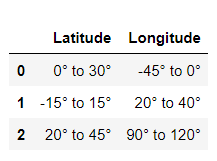

In [1]:
# Importing libraries to download required data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import struct

# Using files retrieved from Task 1 

Performing Data Manipulation for Spacecraft Altitude ~100km (+/- 10)

In [2]:
# Determining the .dat and .lbl files available locally.

import os

directory = './Task1'  # Replace with your directory path
files = os.listdir(directory)

dat_files = []
lbl_files = []
for file in files:
    if file.endswith('.dat'):
        dat_files.append(file)
    elif file.endswith('.lbl'):
        lbl_files.append(file)

In [ ]:
data_0 = []
data_1 = []
data_2 = []

# Iterating through all .dat and .lbl files.
for i in dat_files:
    print(f"Working on file {i}")
    if i[:-4] + ".lbl" in lbl_files:
        filename = f"./Task1/{i[:-4]}.lbl"
        datafilename = f"./Task1/{i}"
    else:
        continue

    # Define the record format for the label file
    label_format = [
        ("PDS_VERSION_ID", "23s"),
        ("RECORD_TYPE", "23s"),
        ("RECORD_BYTES", "23s"),
        ("FILE_RECORDS", "23s"),
        ("^TABLE", "23s"),
        ("DATA_SET_NAME", "59s"),
        ("DATA_SET_ID", "33s"),
        ("PRODUCT_ID", "23s"),
        ("PRODUCT_TYPE", "23s"),
        ("PRODUCT_VERSION_ID", "23s"),
        ("SPACECRAFT_NAME", "23s"),
        ("INSTRUMENT_NAME", "23s"),
        ("TARGET_NAME", "23s"),
        ("START_TIME", "23s"),
        ("STOP_TIME", "23s"),
        ("SPACECRAFT_CLOCK_START_COUNT", "23s"),
        ("SPACECRAFT_CLOCK_STOP_COUNT", "23s"),
        ("PRODUCT_CREATION_TIME", "23s")
    ]

    # Define the record format for the data file
    data_format = [
        ("accepted_spectrum", "512f"),
        ("rejected_spectrum", "512f"),
        ("deadtime", "f"),
        ("overload", "f"),
        ("grs_temperature", "f"),
        ("earth_received_time", "f"),
        ("spacecraft_altitude", "f"),
        ("subspacecraft_latitude", "f"),
        ("subspacecraft_longitude", "f")
    ]

    # Open the data file for reading
    with open(filename, "r") as f:
        label = {}
        for line in f:
            # Ignoring all comments in the .lbl file.
            if line.strip() and not line.startswith("#"):
                # Splitting lines and reading values for corresponding labels
                parts = line.split("=", 1)
                if len(parts) == 2:
                    key = parts[0].strip()
                    value = parts[1].strip()
                    label[key] = value

    # Read the data file
    with open(datafilename, "rb") as f:
        for i in range(int(label["FILE_RECORDS"])):
            record = {}
            for field, format in data_format:
                bytes = f.read(struct.calcsize(format))
                value = struct.unpack(format, bytes)[0]
                # Separate condition for accepted and rejected spectrum as they 512 data items.
                if field == "accepted_spectrum" or field == "rejected_spectrum":
                    value = struct.unpack(format, bytes)
                record[field] = value
            
            if record["spacecraft_altitude"] <= 110 and record["spacecraft_altitude"] >= 90:
                if (record["subspacecraft_latitude"] <= 30 and record["subspacecraft_latitude"] >= 0) and ((record["subspacecraft_longitude"] <= 360 and record["subspacecraft_longitude"] >= 315) or (record["subspacecraft_longitude"] <= 0 and record["subspacecraft_longitude"] >= -45)):
                    data_0.append(record)
                elif (record["subspacecraft_latitude"] <= 15 and record["subspacecraft_latitude"] >= -15) and (record["subspacecraft_longitude"] <= 20 and record["subspacecraft_longitude"] >= 40):
                    data_1.append(record)            
                elif (record["subspacecraft_latitude"] <= 45 and record["subspacecraft_latitude"] >= 20) and (record["subspacecraft_longitude"] <= 120 and record["subspacecraft_longitude"] >= 90):
                    data_2.append(record)           

Working on file 1998_016_grs.dat
Working on file 1998_017_grs.dat
Working on file 1998_018_grs.dat
Working on file 1998_019_grs.dat
Working on file 1998_020_grs.dat
Working on file 1998_021_grs.dat
Working on file 1998_022_grs.dat
Working on file 1998_023_grs.dat
Working on file 1998_024_grs.dat
Working on file 1998_025_grs.dat
Working on file 1998_026_grs.dat
Working on file 1998_027_grs.dat
Working on file 1998_028_grs.dat
Working on file 1998_029_grs.dat
Working on file 1998_030_grs.dat
Working on file 1998_031_grs.dat
Working on file 1998_032_grs.dat
Working on file 1998_033_grs.dat
Working on file 1998_034_grs.dat
Working on file 1998_035_grs.dat
Working on file 1998_036_grs.dat
Working on file 1998_037_grs.dat
Working on file 1998_038_grs.dat
Working on file 1998_039_grs.dat
Working on file 1998_040_grs.dat
Working on file 1998_041_grs.dat
Working on file 1998_042_grs.dat
Working on file 1998_043_grs.dat
Working on file 1998_044_grs.dat
Working on file 1998_045_grs.dat
Working on

In [ ]:
df_0 = pd.DataFrame(data_0)
print("GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°")
df_0.to_csv("./Task2/dataset_0.csv", index = False)

In [ ]:
df_1 = pd.DataFrame(data_1)
print("GRS Data for Spacecraft Latitude between -15° to 15° and Spacecraft Longitude between 20° to 40°")
df_1.to_csv("./Task2/dataset_1.csv", index = False)

In [ ]:
df_2 = pd.DataFrame(data_2)
print("GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°")
df_2.to_csv("./Task2/dataset_2.csv", index = False)

In [ ]:
size_df_0 = len(df_0.index)
size_df_1 = len(df_1.index)
size_df_2 = len(df_2.index)
print(f"Length of Dataframe 0: {size_df_0}")
print(f"Length of Dataframe 1: {size_df_1}")
print(f"Length of Dataframe 2: {size_df_2}")

In [ ]:
# Only saving first 5760 data points.

df_0 = pd.DataFrame(data_0)
df_0[:size_df_2].to_csv("./Task2/dataset_0.csv", index = False)

In [ ]:
# Finding the sum of all accepted_spectrums, and inserting an additional column in the dataframe.

def find_sum_spectrum(filename):
    data = pd.read_csv(f"./Task2/{filename}.csv")
    sum_accepted_spectrum = []
    for i in range(len(data.index)):
        temp = data["accepted_spectrum"][i].lstrip("(").rstrip(")").split(",")
        temp = [float(j.strip()) for j in temp]
        sum_accepted_spectrum.append(sum(temp))
    data["sum_accepted_spectrum"] = sum_accepted_spectrum
    data.to_csv(f"./Task2/{filename}.csv", index = False)

In [ ]:
find_sum_spectrum("dataset_0")
data_0 = pd.read_csv("./Task2/dataset_0.csv")
data_0

In [ ]:
find_sum_spectrum("dataset_2")
data_2 = pd.read_csv("./Task2/dataset_2.csv")
data_2

In [ ]:
# Normalising the data for plotting.
scaler = MinMaxScaler()
np_data_0 = np.array(data_0["sum_accepted_spectrum"])
np_data_0 = np_data_0.reshape(-1,1)
scaled_data_0 = scaler.fit_transform(np_data_0)

np_data_2 = np.array(data_2["sum_accepted_spectrum"])
np_data_2 = np_data_2.reshape(-1,1)
scaled_data_2 = scaler.fit_transform(np_data_2)

# Visualising the captured spectra

**NOTE**: GRS Data for Spacecraft Latitude between -15° to 15° and Spacecraft Longitude between 20° to 40° was a null dataset. Thus the corresponding plot is being ignored.

In [ ]:
plt.figure(figsize = (25, 10))
plt.plot(scaled_data_0, label = "GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°")
plt.plot(scaled_data_2, label = "GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°" )
plt.legend(loc="upper left")
plt.title("Spectrum Counts at an Altitude of 100km")
plt.ylabel("Normalised Spectrum Count")
plt.xlabel("Row Number/32 second point")

# Performing Data Manipulation for Spacecraft Altitude ~30km (+/- 3) 


In [ ]:
data_0 = []
data_1 = []
data_2 = []

# Iterating through all .dat and .lbl files.
for i in dat_files:
    print(f"Working on file {i}")
    if i[:-4] + ".lbl" in lbl_files:
        filename = f"./Task1/{i[:-4]}.lbl"
        datafilename = f"./Task1/{i}"
    else:
        continue

    # Define the record format for the label file
    label_format = [
        ("PDS_VERSION_ID", "23s"),
        ("RECORD_TYPE", "23s"),
        ("RECORD_BYTES", "23s"),
        ("FILE_RECORDS", "23s"),
        ("^TABLE", "23s"),
        ("DATA_SET_NAME", "59s"),
        ("DATA_SET_ID", "33s"),
        ("PRODUCT_ID", "23s"),
        ("PRODUCT_TYPE", "23s"),
        ("PRODUCT_VERSION_ID", "23s"),
        ("SPACECRAFT_NAME", "23s"),
        ("INSTRUMENT_NAME", "23s"),
        ("TARGET_NAME", "23s"),
        ("START_TIME", "23s"),
        ("STOP_TIME", "23s"),
        ("SPACECRAFT_CLOCK_START_COUNT", "23s"),
        ("SPACECRAFT_CLOCK_STOP_COUNT", "23s"),
        ("PRODUCT_CREATION_TIME", "23s")
    ]

    # Define the record format for the data file
    data_format = [
        ("accepted_spectrum", "512f"),
        ("rejected_spectrum", "512f"),
        ("deadtime", "f"),
        ("overload", "f"),
        ("grs_temperature", "f"),
        ("earth_received_time", "f"),
        ("spacecraft_altitude", "f"),
        ("subspacecraft_latitude", "f"),
        ("subspacecraft_longitude", "f")
    ]

    # Open the data file for reading
    with open(filename, "r") as f:
        label = {}
        for line in f:
            # Ignoring all comments in the .lbl file.
            if line.strip() and not line.startswith("#"):
                # Splitting lines and reading values for corresponding labels
                parts = line.split("=", 1)
                if len(parts) == 2:
                    key = parts[0].strip()
                    value = parts[1].strip()
                    label[key] = value

    # Read the data file
    with open(datafilename, "rb") as f:
        for i in range(int(label["FILE_RECORDS"])):
            record = {}
            for field, format in data_format:
                bytes = f.read(struct.calcsize(format))
                value = struct.unpack(format, bytes)[0]
                # Separate condition for accepted and rejected spectrum as they 512 data items.
                if field == "accepted_spectrum" or field == "rejected_spectrum":
                    value = struct.unpack(format, bytes)
                record[field] = value
            
            if record["spacecraft_altitude"] <= 33 and record["spacecraft_altitude"] >= 27:
                if (record["subspacecraft_latitude"] <= 30 and record["subspacecraft_latitude"] >= 0) and ((record["subspacecraft_longitude"] <= 360 and record["subspacecraft_longitude"] >= 315) or (record["subspacecraft_longitude"] <= 0 and record["subspacecraft_longitude"] >= -45)):
                    data_0.append(record)
                elif (record["subspacecraft_latitude"] <= 15 and record["subspacecraft_latitude"] >= -15) and (record["subspacecraft_longitude"] <= 20 and record["subspacecraft_longitude"] >= 40):
                    data_1.append(record)            
                elif (record["subspacecraft_latitude"] <= 45 and record["subspacecraft_latitude"] >= 20) and (record["subspacecraft_longitude"] <= 120 and record["subspacecraft_longitude"] >= 90):
                    data_2.append(record)           

In [ ]:
df_0 = pd.DataFrame(data_0)
print("GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°")
df_0.to_csv("./Task2/dataset_30_0.csv", index = False)

In [ ]:
df_1 = pd.DataFrame(data_1)
print("GRS Data for Spacecraft Latitude between -15° to 15° and Spacecraft Longitude between 20° to 40°")
df_1.to_csv("./Task2/dataset_30_1.csv", index = False)

In [ ]:
df_2 = pd.DataFrame(data_2)
print("GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°")
df_2.to_csv("./Task2/dataset_30_2.csv", index = False)

In [ ]:
size_df_0 = len(df_0.index)
size_df_1 = len(df_1.index)
size_df_2 = len(df_2.index)
print(f"Length of Dataframe 0: {size_df_0}")
print(f"Length of Dataframe 1: {size_df_1}")
print(f"Length of Dataframe 2: {size_df_2}")

In [ ]:
# Only saving first 353 data points.

df_0 = pd.DataFrame(data_0)
df_0[:size_df_2].to_csv("./Task2/dataset_30_0.csv", index = False)

In [ ]:
# Finding the sum of all accepted_spectrums, and inserting an additional column in the dataframe.

def find_sum_spectrum(filename):
    data = pd.read_csv(f"./Task2/{filename}.csv")
    sum_accepted_spectrum = []
    for i in range(len(data.index)):
        temp = data["accepted_spectrum"][i].lstrip("(").rstrip(")").split(",")
        temp = [float(j.strip()) for j in temp]
        sum_accepted_spectrum.append(sum(temp))
    data["sum_accepted_spectrum"] = sum_accepted_spectrum
    data.to_csv(f"./Task2/{filename}.csv", index = False)

In [ ]:
find_sum_spectrum("dataset_30_0")
data_0 = pd.read_csv("./Task2/dataset_30_0.csv")
data_0

In [ ]:
find_sum_spectrum("dataset_30_2")
data_2 = pd.read_csv("./Task2/dataset_30_2.csv")
data_2

In [ ]:
# Normalising the data for plotting.
scaler = MinMaxScaler()
np_data_0 = np.array(data_0["sum_accepted_spectrum"])
np_data_0 = np_data_0.reshape(-1,1)
scaled_data_0 = scaler.fit_transform(np_data_0)

np_data_2 = np.array(data_2["sum_accepted_spectrum"])
np_data_2 = np_data_2.reshape(-1,1)
scaled_data_2 = scaler.fit_transform(np_data_2)

In [ ]:
plt.figure(figsize = (25, 10))
plt.plot(scaled_data_0, label = "GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°")
plt.plot(scaled_data_2, label = "GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°" )
plt.legend(loc="upper left")
plt.title("Spectrum Counts at an Altitude of 30km")
plt.ylabel("Normalised Spectrum Count")
plt.xlabel("Row Number/32 second point")

# Task Complete

The corresponding data manipulation has been performed and the graphs have been plotted for GRS data collected at an altitude of 100km and 30km.

*Kindly note that certain outputs while fetching the data have been cleared. Only necessary outputs have been displayed*